In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
data= pd.read_csv("C:/Users/Cold min/OneDrive/바탕 화면/Raisin_Dataset.csv")
df = pd.DataFrame(data=data)

In [10]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [11]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    df[i]=le.fit_transform(data[i])

In [13]:
df.head

<bound method NDFrame.head of      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0     551              553              500           558         542     811   
1     404              446              409           469         413     299   
2     583              554              581           448         571     102   
3      74               54              159           108          68     394   
4     462              254              709            33         445     890   
..    ...              ...              ...           ...         ...     ...   
895   504              512              449           542         492     215   
896   549              546              540           508         549      99   
897   640              517              739           174         650     722   
898   600              633              506           683         600     177   
899   529              706              200           877         532      82  

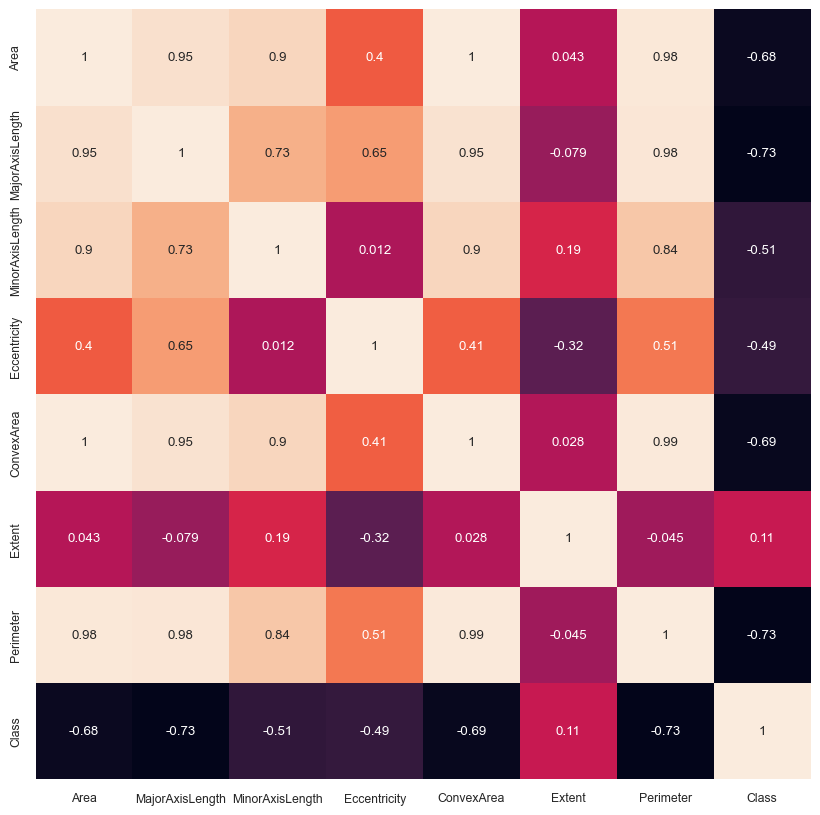

In [14]:
#상관 관계 행렬
data_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [17]:
# 데이터 분할
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encoder =  LabelEncoder()

X = df.drop('Class', axis=1)
y = df['Class']

y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(720, 7)

In [19]:
y_train.shape

(720, 2)

In [91]:
#Defining the mode
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(100,input_shape=(7,),activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 100)               800       
                                                                 
 dense_89 (Dense)            (None, 80)                8080      
                                                                 
 dense_90 (Dense)            (None, 60)                4860      
                                                                 
 dense_91 (Dense)            (None, 2)                 122       
                                                                 
Total params: 13,862
Trainable params: 13,862
Non-trainable params: 0
_________________________________________________________________


C:\Users\Cold min\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [92]:
# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 45.1221 - accuracy: 0.5903 - val_loss: 0.5563 - val_accuracy: 0.7833
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5477 - accuracy: 0.7764 - val_loss: 0.4709 - val_accuracy: 0.7944
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.7833 - val_loss: 0.4979 - val_accuracy: 0.7944
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.7597 - val_loss: 0.5140 - val_accuracy: 0.8111
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.8028 - val_loss: 0.4115 - val_accuracy: 0.8278
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3974 - accuracy: 0.8236 - val_loss: 0.4546 - val_accuracy: 0.7611
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.8167 - val_loss: 0.3940 - val_accuracy: 0.8333
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.8417 - val_loss: 0.3343 - val_accuracy: 0.8722
Epoch 60/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8444 - val_loss: 0.3440 - val_accuracy: 0.8556
Epoch 61/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.8528 - val_loss: 0.3668 - val_accuracy: 0.8500
Epoch 62/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8583 - val_loss: 0.3331 - val_accuracy: 0.8556
Epoch 63/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3387 - accuracy: 0.8708 - val_loss: 0.3560 - val_accuracy: 0.8500
Epoch 64/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8569 - val_loss: 0.3293 - val_accuracy: 0.8444
Epoch 65/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8569 - val_loss: 0.3306 - val_accuracy: 0.8556
Epoch 

In [93]:
         #Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        86
           1       0.91      0.82      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.87      0.86      0.86       180

[[78  8]
 [17 77]]
